## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter

Get the Cycle Power Plant Data Set

In [2]:
# Read into the file
df = pd.read_excel('../Data/CCPP/Folds5x2_pp.xlsx', sheet_name=0)
print(df)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


### (b) Exploring the data

#### i. rows and columns

There are 9568 rows of data consisting of 5 columns and each row represents a single data point collected at a specific time, and each column represents a feature related to the power plant's operation.
 Features (AT, V, AP, RH) are used to predict the target variable (PE).

In [3]:
print(df.shape)

(9568, 5)


#### ii. pairwise scatterplots of all the varianbles

Description: For the pairwise scatter plot there seem to have a linear relationship between variables, and they seem to be clustered together, however, there are outliers in each graph that may effect the relationship if doing linear regression.

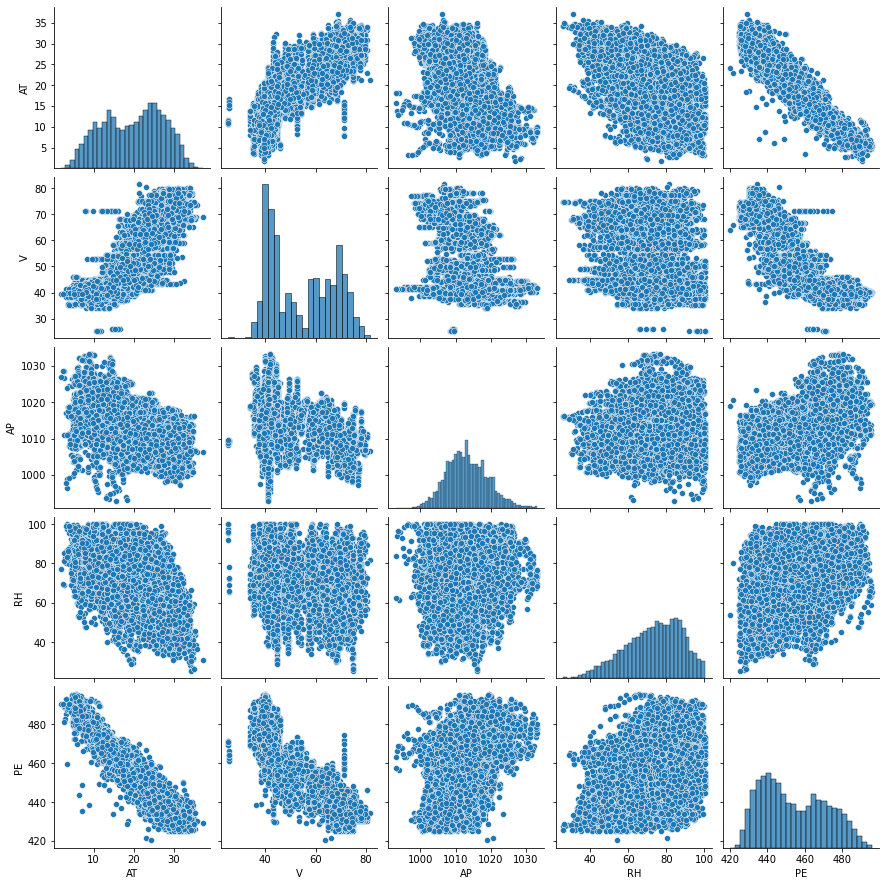

In [4]:
# Create pairwise scatter plots
sns.pairplot(df)
plt.show()

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
# Calculate the basic statistics
basic_stats = df.describe()

# Calculate the range for each variable
range_stats = df.max() - df.min()

# Calculate the interquartile range for each variable
iqr_stats = df.quantile(0.75) - df.quantile(0.25)

# Create a summary table
summary_table = pd.DataFrame({
    'Mean': basic_stats.loc['mean'],
    'Median': df.median(),
    'Range': range_stats,
    'First Quartile (Q1)': basic_stats.loc['25%'],
    'Third Quartile (Q3)': basic_stats.loc['75%'],
    'Interquartile Range (IQR)': iqr_stats
})

print(summary_table)

           Mean    Median  Range  First Quartile (Q1)  Third Quartile (Q3)  \
AT    19.651231    20.345  35.30              13.5100                25.72   
V     54.305804    52.080  56.20              41.7400                66.54   
AP  1013.259078  1012.940  40.41            1009.1000              1017.26   
RH    73.308978    74.975  74.60              63.3275                84.83   
PE   454.365009   451.550  75.50             439.7500               468.43   

    Interquartile Range (IQR)  
AT                    12.2100  
V                     24.8000  
AP                     8.1600  
RH                    21.5025  
PE                    28.6800  


### (c) Simple Linear Regression

Description:
Based on my models, all 4 features are good predictors for PE and they are all statistically significant association between the predictor and the response. And for PE VS AT,AP graph, I would want to remove the outliers because you can clearly see there are deviation from the zero line, some points lie way far away from the zero line, but you can see that some of the predictors and response have inverse relationship.

Results for predictor: AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:54:47   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341     

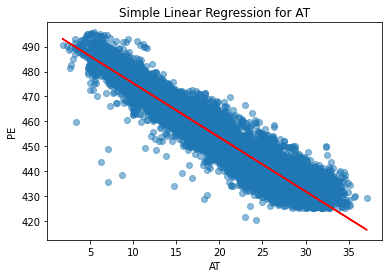

Results for predictor: V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:54:48   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      

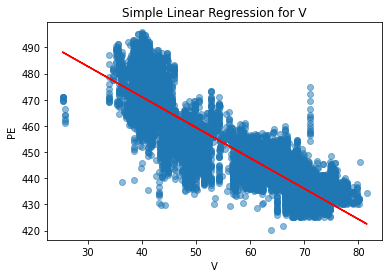

Results for predictor: AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:54:48   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     

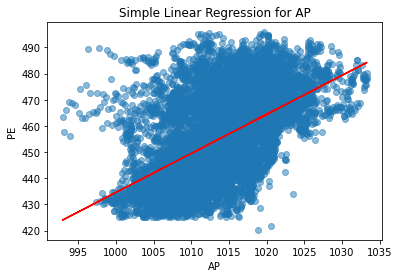

Results for predictor: RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:54:48   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618     

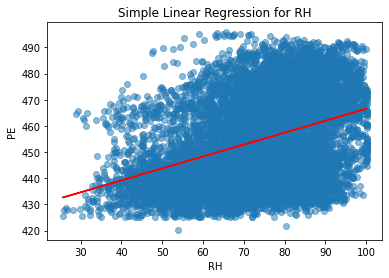

In [6]:
# Define predictors
predictors = ['AT', 'V', 'AP', 'RH']

# Loop through predictors to fit models
for predictor in predictors:
    X = df[[predictor]]
    y = df['PE']
    
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X)
    results = model.fit()
    
    print(f"Results for predictor: {predictor}")
    print(results.summary())
    
    # Plotting the regression line
    plt.scatter(X[predictor], y, alpha=0.5)
    plt.plot(X[predictor], results.predict(X), color='red')
    plt.xlabel(predictor)
    plt.ylabel('PE')
    plt.title(f"Simple Linear Regression for {predictor}")
    plt.show()

Residual plots

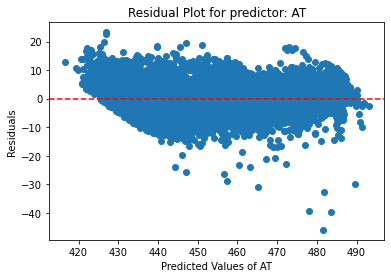

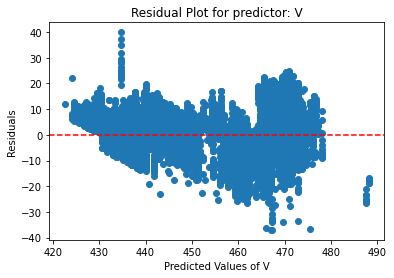

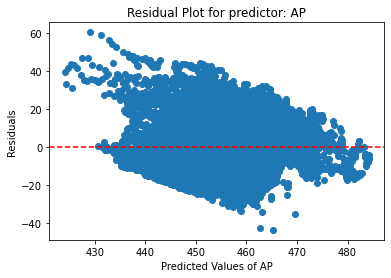

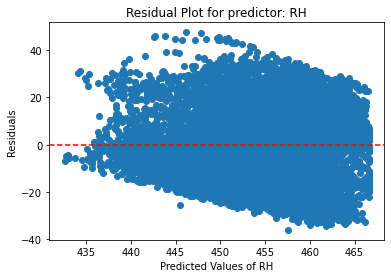

In [7]:
# List of predictors
predictors = ['AT', 'V', 'AP', 'RH']

# Response variable
response = 'PE'

# Loop through each predictor and fit a separate model, then plot the residuals
for predictor in predictors:
    X = df[[predictor]]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    y = df[response]
    
    model = sm.OLS(y, X)
    results = model.fit()
    
    residuals = results.resid
    predicted_values = results.fittedvalues
    
    plt.figure()
    plt.scatter(predicted_values, residuals)
    plt.xlabel(f'Predicted Values of {predictor}')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residual Plot for predictor: {predictor}')
    plt.show()

### (d) Multiple Regression

Description: Based on my regression results, all the predictors have p-value <0.05 so they can all reject the null hypothesis, but some of the predictors are positively related to the response and some are negatively related to the response.

In [8]:
X = df[['AT', 'V', 'AP', 'RH']]  # Multiple predictors
y = df['PE']

X = sm.add_constant(X)  # Adds a constant term to the predictors
model = sm.OLS(y, X)
results = model.fit()

# To see detailed results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:54:49   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

### (e) 1c Compare to 1d
AT and V: These variables still have strong (though slightly attenuated) effects on the dependent variable even when other predictors are taken into account. Their signs remain consistent, indicating a negative relationship with power efficiency.

AP: The multiple regression coefficient is close to zero, suggesting that this predictor might not be very useful when other variables are considered.

RH: The sign of the coefficient changed, which suggests a more complicated relationship with the dependent variable that could be influenced by other predictors.

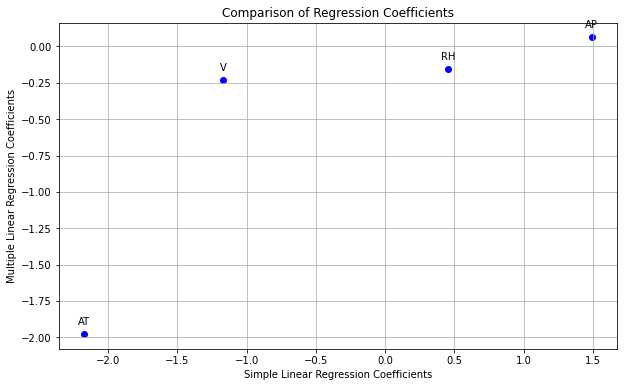

In [9]:
coef_at_simple = -2.1713
coef_v_simple = -1.1681
coef_ap_simple = 1.4899
coef_rh_simple = 0.4557


multi_coef_at = -1.9775
multi_coef_v = -0.2339 
multi_coef_ap = 0.0621
multi_coef_rh = -0.1581 

# Store the coefficients in lists
simple_coeffs = [coef_at_simple, coef_v_simple, coef_ap_simple, coef_rh_simple]
multiple_coeffs = [multi_coef_at, multi_coef_v, multi_coef_ap, multi_coef_rh]

# Predictor names
predictors = ['AT', 'V', 'AP', 'RH']

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(simple_coeffs, multiple_coeffs, c='blue', marker='o')

# Label each point
for i, txt in enumerate(predictors):
    plt.annotate(txt, (simple_coeffs[i], multiple_coeffs[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Simple Linear Regression Coefficients')
plt.ylabel('Multiple Linear Regression Coefficients')
plt.title('Comparison of Regression Coefficients')
plt.grid(True)
plt.show()

### (f) Nonlinear Association
For AT and V, the polynomial terms are statistically significant, and the R-squared values are high, suggesting that nonlinear models might better capture the relationship between these predictors and the response.

For AP and RH, although the polynomial terms are statistically significant (based on p-values), the low R-squared suggests that they are not good predictors for the response on their own. Nonlinear models might not be very beneficial for these variables, or other variables may be needed in the model to explain the response.

In [10]:
# # Extracting the response variable 'PE'
# y = df['PE']  

# # Predictors to analyze for nonlinear association
# predictors = ['AT', 'V', 'AP', 'RH']

# # DataFrame to collect results
# results_df = pd.DataFrame(columns=['Predictor', 'p-values', 'R-squared'])

# for predictor in predictors:
#     # Creating polynomial features (X, X^2, X^3)
#     X = pd.DataFrame({
#         f'{predictor}': df[predictor],
#         f'{predictor}^2': df[predictor]**2,
#         f'{predictor}^3': df[predictor]**3
#     })
    
#     # Adding a constant term
#     X = sm.add_constant(X)
    
#     # Fitting the polynomial regression model
#     model = sm.OLS(y, X).fit()
    
#     # Extracting the p-values for each term in the polynomial equation
#     p_values = model.pvalues.to_dict()
    
#     # Extracting the R-squared value
#     r_squared = model.rsquared
    
#     # Storing results
#     temp_df = pd.DataFrame({
#         'Predictor': [predictor], 
#         'p-values': [p_values],
#         'R-squared': [r_squared]
#     })
#     results_df = pd.concat([results_df, temp_df], ignore_index=True)

# # Displaying results
# print("Results:")
# print(results_df)

### stats + visualization for 1(f)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:54:49   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

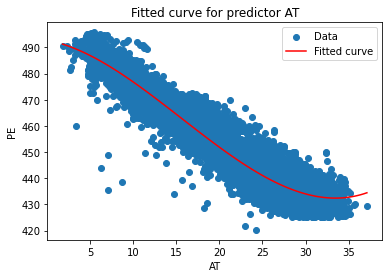

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:54:49   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

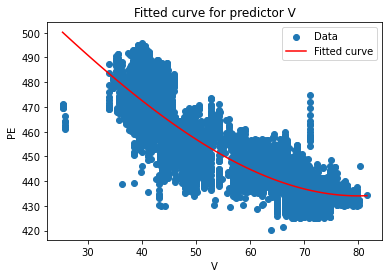

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:54:49   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

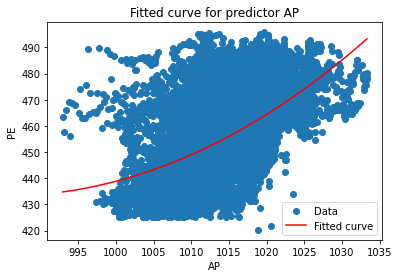

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:54:50   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

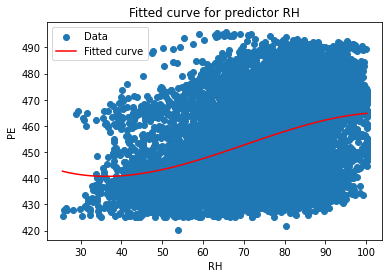

In [11]:
y = df['PE']

# Loop through each predictor
for predictor in ['AT', 'V', 'AP', 'RH']:
    
    # Create the feature matrix with the predictor and its squares and cubes
    X = pd.DataFrame({
        'X1': df[predictor],
        'X2': df[predictor] ** 2,
        'X3': df[predictor] ** 3
    })
    
    # Add a constant to the predictor variables (it's a best practice)
    X = sm.add_constant(X)
    
    # Fit the model
    model = sm.OLS(y, X).fit()
    
    # Print summary statistics of the model's performance
    print(model.summary())
    
    # Create a scatter plot of the data
    plt.scatter(df[predictor], y, label='Data')
    
    # Create a sequence of 100 evenly spaced values over the range of the predictor
    x_range = np.linspace(df[predictor].min(), df[predictor].max(), 100)
    
    # Create a DataFrame to hold the predictors for these x values
    x_values = pd.DataFrame({'X1': x_range, 'X2': x_range ** 2, 'X3': x_range ** 3})
    
    # Add a constant to the predictor variables (it's a best practice)
    x_values = sm.add_constant(x_values)
    
    # Compute the fitted y values
    y_fitted = model.predict(x_values)
    
    # Create a plot of the fitted curve
    plt.plot(x_range, y_fitted, label='Fitted curve', color='red')
    
    plt.title(f"Fitted curve for predictor {predictor}")
    plt.xlabel(predictor)
    plt.ylabel('PE')
    plt.legend()
    plt.show()

### (g) Interactions of Predictors

The interaction term AT*V is highly significant and positive, suggesting that the combined effect of ambient temperature and exhaust vacuum increases the energy output.

The interaction term AT*RH is also significant but negative, suggesting that the combined effect of ambient temperature and relative humidity reduces the energy output.

Variables like AT and AP are not significant when considering all other factors, which could mean that their effects are being captured by the interaction terms or other variables.

In [12]:
predictors = ['AT', 'V', 'AP', 'RH']
interaction_terms = []

for i in range(len(predictors)):
    for j in range(i, len(predictors)):
        if i != j:
            interaction_term = f"{predictors[i]}*{predictors[j]}"
            df[interaction_term] = df[predictors[i]] * df[predictors[j]]
            interaction_terms.append(interaction_term)

# Independent variables.
X = df[predictors + interaction_terms]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Dependent variable.
y = df['PE']

# Check for data leakage.
print("Dependent variable 'y':", y.name)
print("Independent variables 'X':", X.columns.tolist())

# Split data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model.
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set.
y_pred = model.predict(X_test)

# Evaluate the model.
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

# Summary of regression, including coefficients and p-values.
print(model.summary())

Dependent variable 'y': PE
Independent variables 'X': ['const', 'AT', 'V', 'AP', 'RH', 'AT*V', 'AT*AP', 'AT*RH', 'V*AP', 'V*RH', 'AP*RH']
Test MSE: 18.35531077238789
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.121e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:54:50   Log-Likelihood:                -22048.
No. Observations:                7654   AIC:                         4.412e+04
Df Residuals:                    7643   BIC:                         4.420e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t 

### (h) Improvement
A lower MSE value for the training and test sets suggests a better fit to the data.
The MSE values for both training and testing being close to each other suggest good generalization.
It seems that the addition of interaction terms has helped improve the model's performance without leading to overfitting, given that the train and test MSE are quite close.

In [13]:
# Create a copy to avoid SettingWithCopyWarning
X = df[['AT', 'V', 'AP', 'RH']].copy()
y = df['PE'].copy()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Adding interaction terms for training data
X_train = X_train.copy()
X_train['AT*V'] = X_train['AT'] * X_train['V']
X_train['AT*AP'] = X_train['AT'] * X_train['AP']
X_train['AT*RH'] = X_train['AT'] * X_train['RH']
X_train['V*AP'] = X_train['V'] * X_train['AP']
X_train['V*RH'] = X_train['V'] * X_train['RH']
X_train['AP*RH'] = X_train['AP'] * X_train['RH']

# Adding interaction terms for testing data
X_test = X_test.copy()
X_test['AT*V'] = X_test['AT'] * X_test['V']
X_test['AT*AP'] = X_test['AT'] * X_test['AP']
X_test['AT*RH'] = X_test['AT'] * X_test['RH']
X_test['V*AP'] = X_test['V'] * X_test['AP']
X_test['V*RH'] = X_test['V'] * X_test['RH']
X_test['AP*RH'] = X_test['AP'] * X_test['RH']

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

Train MSE: 18.340878734296854
Test MSE: 19.075194112902714


### (i) KNN

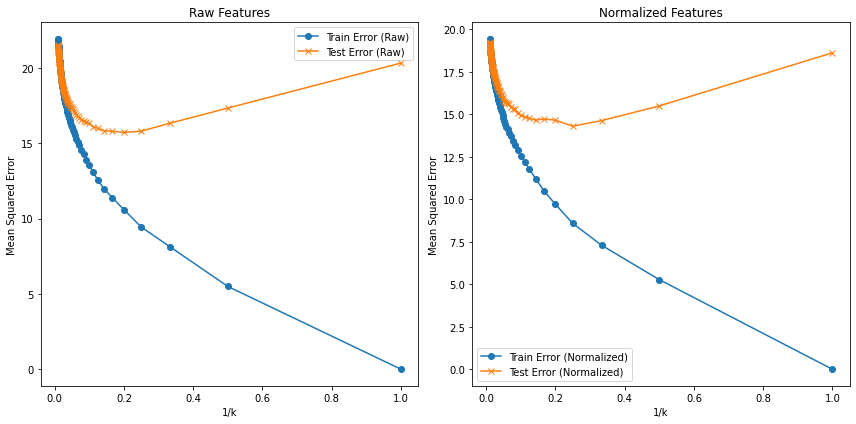

In [14]:
# Features and target variable
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize variables for storing results
raw_errors_train = []
raw_errors_test = []
normalized_errors_train = []
normalized_errors_test = []
k_values = list(range(1, 101))

# Perform k-NN regression for k in [1, 100]
for k in k_values:
    # With raw features
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, y_train)
    raw_errors_train.append(mean_squared_error(y_train, knn_raw.predict(X_train)))
    raw_errors_test.append(mean_squared_error(y_test, knn_raw.predict(X_test)))

    # With normalized features
    knn_norm = KNeighborsRegressor(n_neighbors=k)
    knn_norm.fit(X_train_scaled, y_train)
    normalized_errors_train.append(mean_squared_error(y_train, knn_norm.predict(X_train_scaled)))
    normalized_errors_test.append(mean_squared_error(y_test, knn_norm.predict(X_test_scaled)))

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot([1 / k for k in k_values], raw_errors_train, label='Train Error (Raw)', marker='o')
plt.plot([1 / k for k in k_values], raw_errors_test, label='Test Error (Raw)', marker='x')
plt.title("Raw Features")
plt.xlabel("1/k")
plt.ylabel("Mean Squared Error")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([1 / k for k in k_values], normalized_errors_train, label='Train Error (Normalized)', marker='o')
plt.plot([1 / k for k in k_values], normalized_errors_test, label='Test Error (Normalized)', marker='x')
plt.title("Normalized Features")
plt.xlabel("1/k")
plt.ylabel("Mean Squared Error")
plt.legend()

plt.tight_layout()
plt.show()

### (j ) Compare KNN and Linear

Best k for raw features: 5
Best k for normalized features: 4


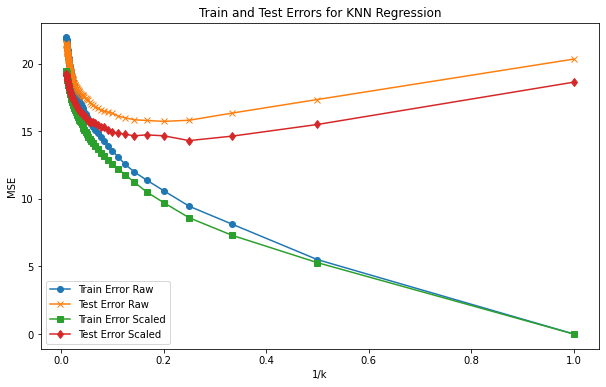

Test MSE for best Linear Regression model: 19.075194112902714
Test MSE for best KNN model with raw features: 15.726819842563568
Test MSE for best KNN model with normalized features: 14.305669422675024


In [15]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize variables to store MSE for each k and for both raw and normalized features
train_errors_raw = []
test_errors_raw = []
train_errors_scaled = []
test_errors_scaled = []

k_values = list(range(1, 101))

# Find the best k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Using raw features
    knn.fit(X_train, y_train)
    train_mse_raw = mean_squared_error(y_train, knn.predict(X_train))
    test_mse_raw = mean_squared_error(y_test, knn.predict(X_test))
    
    # Using normalized features
    knn.fit(X_train_scaled, y_train)
    train_mse_scaled = mean_squared_error(y_train, knn.predict(X_train_scaled))
    test_mse_scaled = mean_squared_error(y_test, knn.predict(X_test_scaled))
    
    train_errors_raw.append(train_mse_raw)
    test_errors_raw.append(test_mse_raw)
    train_errors_scaled.append(train_mse_scaled)
    test_errors_scaled.append(test_mse_scaled)

# Find best k for raw and normalized features
best_k_raw = k_values[np.argmin(test_errors_raw)]
best_k_scaled = k_values[np.argmin(test_errors_scaled)]

print(f"Best k for raw features: {best_k_raw}")
print(f"Best k for normalized features: {best_k_scaled}")

# Plotting
plt.figure(figsize=(10, 6))

plt.plot([1/k for k in k_values], train_errors_raw, label='Train Error Raw', marker='o')
plt.plot([1/k for k in k_values], test_errors_raw, label='Test Error Raw', marker='x')

plt.plot([1/k for k in k_values], train_errors_scaled, label='Train Error Scaled', marker='s')
plt.plot([1/k for k in k_values], test_errors_scaled, label='Test Error Scaled', marker='d')

plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('Train and Test Errors for KNN Regression')
plt.legend()
plt.show()

# Previously obtained smallest test error for Linear Regression
linear_mse = 19.075194112902714

print(f"Test MSE for best Linear Regression model: {linear_mse}")
print(f"Test MSE for best KNN model with raw features: {min(test_errors_raw)}")
print(f"Test MSE for best KNN model with normalized features: {min(test_errors_scaled)}")

Expectation: Better with a flexible method

Reasoning: A large sample size can accommodate a more flexible model without leading to overfitting. With fewer predictors, the complexity of the model is naturally reduced, making it easier to fit a flexible model without overfitting. Therefore, the flexible method can capture more nuanced relationships in the data.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

Expectation: Worse with a flexible method

Reasoning: A flexible model with many predictors and a small sample size can easily lead to overfitting. The model might learn the noise in the sample rather than the underlying pattern. An inflexible model would be less susceptible to overfitting in this case.

### (c) The relationship between the predictors and response is highly non-linear.

Expectation: Better with a flexible method

Reasoning: Flexible methods are more capable of capturing complex, non-linear relationships between predictors and response. Inflexible models may be too simple to capture the complexity of the data, leading to high bias.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

Expectation: Worse with a flexible method

Reasoning: If the variance of the error terms is high, it means there is a lot of noise in the relationship between predictors and response. A flexible method would fit this noise, leading to poor generalization. An inflexible method would be less sensitive to the noise.

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [16]:
data = {
    "Obs": [1, 2, 3, 4, 5, 6],
    "X1": [0, 2, 0, 0, -1, 1],
    "X2": [3, 0, 1, 1, 0, 1],
    "X3": [0, 0, 3, 2, 1, 1],
    "Y": ["Red", "Red", "Red", "Green", "Green", "Red"]
}

# Test point
test_point = np.array([0, 0, 0])

# (a) Compute the Euclidean distance
distances = []
for i in range(len(data["Obs"])):
    point = np.array([data["X1"][i], data["X2"][i], data["X3"][i]])
    distance = np.linalg.norm(point - test_point)
    distances.append((distance, data["Y"][i]))

print(f"Distances: {distances}")

# (b) Prediction with K=1
k1_prediction = sorted(distances, key=lambda x: x[0])[0][1]
print(f"Prediction with K=1: {k1_prediction}")

# (c) Prediction with K=3
k3_nearest = sorted(distances, key=lambda x: x[0])[:3]
k3_prediction = Counter([label for _, label in k3_nearest]).most_common(1)[0][0]
print(f"Prediction with K=3: {k3_prediction}")

Distances: [(3.0, 'Red'), (2.0, 'Red'), (3.1622776601683795, 'Red'), (2.23606797749979, 'Green'), (1.4142135623730951, 'Green'), (1.7320508075688772, 'Red')]
Prediction with K=1: Green
Prediction with K=3: Red


### (b) What is our prediction with K = 1? Why?

For k=1 we take the nearest neighbor to the test point. The smallest distance is 1.4142135623730951, 'Green' corresponding to observation 5. So, our prediction would be "Green".

### (c) What is our prediction with K = 3? Why?

(1.7320508075688772, 'Red')For k=3 we take the three nearest neighbors. These are the observations with distances.(2.0, 'Red')(1.4142135623730951, 'Green')(1.7320508075688772, 'Red')Among these, we have 2 "Red" and 1 "Green". The majority class is "Red", so our prediction would be "Red".

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

If the Bayes decision boundary is highly nonlinear, we would generally expect the best value for K to be small. A smaller K value allows the model to be more flexible, making it easier to capture nonlinearities in the data. A large K would smooth out the decision boundary, making the model too inflexible to capture the nonlinear nature of the Bayes decision boundary.